In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [91]:
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics.regression import mean_squared_error

import pandas as pd

In [11]:
boston = load_boston()

In [12]:
print boston['DESCR']

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [106]:
pd.DataFrame(boston['data'])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


(array([  3.,   1.,   7.,   7.,   3.,   6.,   8.,  10.,   8.,  23.,  15.,
         19.,  14.,  16.,  18.,  28.,  36.,  29.,  33.,  28.,  37.,  21.,
         15.,   4.,   7.,  11.,   9.,   9.,   5.,   7.,   7.,   8.,   2.,
          8.,   5.,   4.,   2.,   1.,   1.,   0.,   2.,   2.,   2.,   2.,
          2.,   1.,   1.,   0.,   3.,  16.]),
 array([  5. ,   5.9,   6.8,   7.7,   8.6,   9.5,  10.4,  11.3,  12.2,
         13.1,  14. ,  14.9,  15.8,  16.7,  17.6,  18.5,  19.4,  20.3,
         21.2,  22.1,  23. ,  23.9,  24.8,  25.7,  26.6,  27.5,  28.4,
         29.3,  30.2,  31.1,  32. ,  32.9,  33.8,  34.7,  35.6,  36.5,
         37.4,  38.3,  39.2,  40.1,  41. ,  41.9,  42.8,  43.7,  44.6,
         45.5,  46.4,  47.3,  48.2,  49.1,  50. ]),
 <a list of 50 Patch objects>)

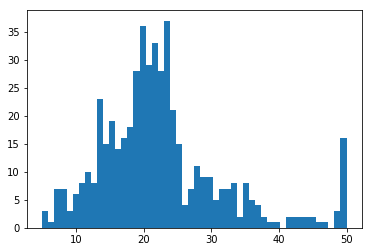

In [15]:
hist(boston['target'], bins=50)

In [16]:
y = boston['target']
X = boston['data']

In [26]:
X_train.shape

(404, 13)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Алгоритмы оптимизации

### SGD and why it sucks

In [196]:
net = MLPRegressor(hidden_layer_sizes=(20,),
                   batch_size=128,
                   solver='sgd',
                   alpha=0.0,
                   learning_rate_init=0.0001,
                   learning_rate='adaptive',
                   verbose=True)
net.fit(X_train, y_train)

Iteration 1, loss = 16424609.53096314
Iteration 2, loss = 396.06231218
Iteration 3, loss = 449.31228545
Iteration 4, loss = 484.99244897
Iteration 5, loss = 507.93873303
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 6, loss = 522.30864087
Iteration 7, loss = 531.47034110
Iteration 8, loss = 537.31079443
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 9, loss = 540.93891991
Iteration 10, loss = 543.23145769
Iteration 11, loss = 544.72337588
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 12, loss = 545.63760840
Iteration 13, loss = 546.23260062
Iteration 14, loss = 546.61135616
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.


MLPRegressor(activation='relu', alpha=0.0, batch_size=128, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='adaptive',
       learning_rate_init=0.0001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

### ADAM (let's look at the optimizer!)

In [263]:
net = MLPRegressor(hidden_layer_sizes=(20,),
                   batch_size=128,
                   solver='adam',
                   alpha=0.0,
                   learning_rate_init=0.01,
                   learning_rate='adaptive',   # don't account for anymore
                   epsilon=1e-8,               # variance smoother
                   beta_1=.9,                  # mean grad EWMA weight
                   beta_2=.999,                # squared grad EWMA weight
                   verbose=True)
net.fit(X_train, y_train)

Iteration 1, loss = 6458.02380431
Iteration 2, loss = 528.34603830
Iteration 3, loss = 1836.22986333
Iteration 4, loss = 453.28733002
Iteration 5, loss = 248.32872880
Iteration 6, loss = 540.91930874
Iteration 7, loss = 282.86584245
Iteration 8, loss = 109.76146052
Iteration 9, loss = 192.44529215
Iteration 10, loss = 146.13891669
Iteration 11, loss = 78.13163709
Iteration 12, loss = 90.32971258
Iteration 13, loss = 75.01249222
Iteration 14, loss = 58.45526044
Iteration 15, loss = 60.42178089
Iteration 16, loss = 49.20214694
Iteration 17, loss = 43.95679771
Iteration 18, loss = 44.60825395
Iteration 19, loss = 41.53455141
Iteration 20, loss = 39.47138418
Iteration 21, loss = 38.61699593
Iteration 22, loss = 37.62191649
Iteration 23, loss = 36.87093188
Iteration 24, loss = 36.01403745
Iteration 25, loss = 35.35069459
Iteration 26, loss = 34.82906565
Iteration 27, loss = 34.33556852
Iteration 28, loss = 34.08693562
Iteration 29, loss = 33.60457564
Iteration 30, loss = 32.48464902
Iterati

MLPRegressor(activation='relu', alpha=0.0, batch_size=128, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

### L-BFGS (watch the time measurement)

In [283]:
%%time
net = MLPRegressor(hidden_layer_sizes=(20,),
                   batch_size=128,
                   solver='lbfgs',
                   alpha=0.0,
                   learning_rate_init=0.01,    # don't account for anymore
                   learning_rate='adaptive',   # don't account for anymore
                   epsilon=1e-8,               # don't account for anymore
                   beta_1=.9,                  # don't account for anymore
                   beta_2=.999,                # don't account for anymore
                   verbose=True)
net.fit(X_train, y_train)

CPU times: user 109 ms, sys: 14.9 ms, total: 124 ms
Wall time: 115 ms


## Число юнитов в слое

### Один скрытый слой

1 9.12576073338 1.7763568394e-15
2 7.32890647556 1.79866091887
3 7.09028441547 1.67337562959
4 7.13212533539 1.79496123857
5 6.67378455914 1.58428874634
6 5.95648310405 0.594772218628
7 6.26172748208 1.17732760453
8 5.97796047467 0.796324589677
9 5.79172256827 0.588346095103
10 5.76022863776 0.239667563697
11 5.65249107309 0.393722095663
12 5.67755289919 0.527620724928
13 5.90843246111 0.237993116459
14 5.89160731141 0.746249561745
15 5.78010948597 0.240553356504
16 5.72595093634 0.341159012909
17 5.91622291848 0.193647675289
18 5.84069447403 0.332029216459
19 5.83070313441 0.242502542087
20 5.61049451894 0.43417420608
21 5.66669426669 0.180928465299
22 5.67775389655 0.498861005674
23 5.69547126236 0.244251474767
24 5.65581053856 0.335967205011
25 5.91172169233 0.105289039349
26 5.72491403158 0.226254055668
27 5.92517758536 0.18083582746
28 5.76910058186 0.3158536938
29 5.81446723669 0.230610144649
30 5.84609480221 0.24369038547


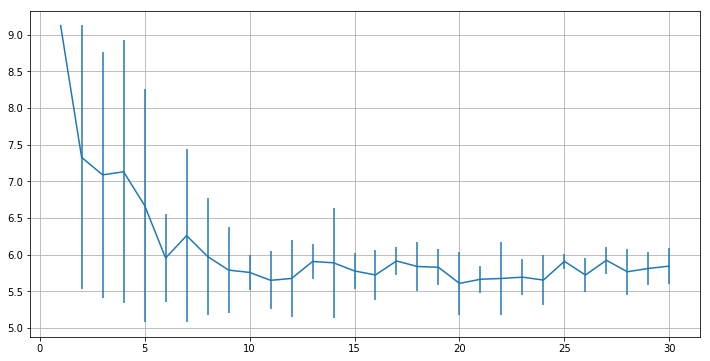

In [299]:
units_per_layer = np.arange(1, 31, 1)
errors = []
errors_std = []
for units in units_per_layer:
    errors_units = []
    for repeat in xrange(10):
        net = MLPRegressor(hidden_layer_sizes=(units,),
                       batch_size=128,
                       solver='lbfgs',
                       alpha=0.0,
    #                    random_state=57,
                       verbose=True)
        net.fit(X_train, y_train)
        error = np.sqrt(mean_squared_error(y_test, net.predict(X_test)))
        errors_units.append(error)
    errors.append(np.mean(errors_units))
    errors_std.append(np.std(errors_units))
    print units, errors[-1], errors_std[-1]

figure(figsize=(12, 6))
errorbar(units_per_layer, errors, yerr=errors_std)
grid('on')

### Два скрытых слоя

### Что лучше: больше юнитов на первом или втором слое?

In [309]:
units_first_layer = np.arange(2, 11, 2)
units_second_layer = np.arange(1, 31, 1)

errors_per_first_units = {}
stds_per_first_units = {}

for first_units in units_first_layer:
    errors = []
    errors_std = []
    for second_units in units_second_layer:
        errors_units = []
        for repeat in xrange(10):
            net = MLPRegressor(
                hidden_layer_sizes=(first_units, second_units,),
                solver='lbfgs',
                alpha=0.0)
            net.fit(X_train, y_train)
            error = np.sqrt(mean_squared_error(y_test, net.predict(X_test)))
            errors_units.append(error)
        errors.append(np.mean(errors_units))
        errors_std.append(np.std(errors_units))
        print second_units, errors[-1], errors_std[-1]

    stds_per_first_units[first_units] = errors_std
    errors_per_first_units[first_units] = errors

1 8.33074833422 1.27986457653
2 8.54616341022 0.783772049577
3 7.89713644519 1.61622294363
4 8.24603690517 1.49322889361
5 7.02694421494 1.7908747775
6 8.14582398502 1.38156463806
7 8.42662490492 1.2881278199
8 7.35804701469 1.62009207644
9 7.11843566262 1.74448270404
10 7.31225425877 1.58260253317
11 7.93354724133 1.57222783945
12 8.05389718894 1.25784282401
13 7.58983010062 1.51987083664
14 8.12020383583 1.55343770672
15 7.16338981933 1.29086994789
16 7.19539284007 1.81874501866
17 8.46921374767 1.29694336795
18 7.06167844529 1.45479823236
19 8.09385638677 1.24759989747
20 8.11648732247 0.868124401197
21 8.01139463883 1.35142449366
22 8.78663313148 0.62146784085
23 7.5261147237 1.63193361525
24 7.58352593389 1.38618363615
25 7.07937200556 1.44495844706
26 8.10816203941 1.36707723523
27 7.77571295827 1.59777002559
28 7.78934275726 1.65846257673
29 7.4525286788 1.89262313139
30 7.34578696505 1.48971780467
1 8.68336738306 1.04121393763
2 7.58536412262 1.65872541891
3 7.16837588965 1.578

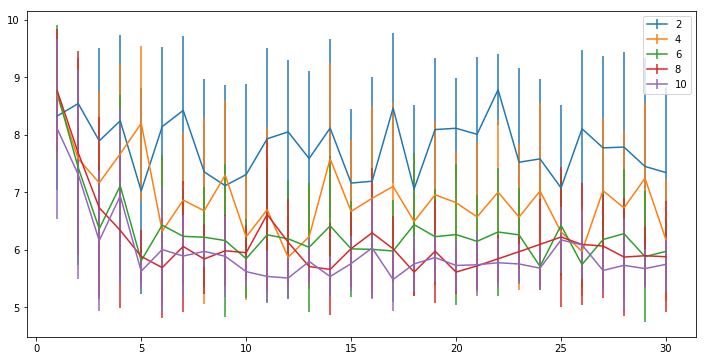

In [310]:
figure(figsize=(12, 6))
for units in sorted(errors_per_first_units):
    errors = errors_per_first_units[units]
    errors_std = stds_per_first_units[units]
    errorbar(units_second_layer, errors, yerr=errors_std, label=str(units))
legend(loc='best')

In [311]:
units_first_layer = np.arange(1, 31, 1)
units_second_layer = np.arange(2, 11, 2)

errors_per_second_units = {}
stds_per_second_units = {}

for second_units in units_second_layer:
    errors = []
    errors_std = []
    for first_units in units_first_layer:
        errors_units = []
        for repeat in xrange(10):
            net = MLPRegressor(
                hidden_layer_sizes=(first_units, second_units,),
                solver='lbfgs',
                alpha=0.0)
            net.fit(X_train, y_train)
            error = np.sqrt(mean_squared_error(y_test, net.predict(X_test)))
            errors_units.append(error)
        errors.append(np.mean(errors_units))
        errors_std.append(np.std(errors_units))
        print first_units, errors[-1], errors_std[-1]

    stds_per_second_units[second_units] = errors_std
    errors_per_second_units[second_units] = errors

1 8.04429853562 1.66232104549
2 9.1257607295 1.590961035e-08
3 7.62172214501 1.75835392979
4 8.00383212489 1.440335134
5 8.30136523727 1.25105770816
6 7.2363967618 1.71084029525
7 8.25830223996 1.45927803694
8 7.29688431327 1.57376712987
9 6.78680858887 1.68724238706
10 7.62977513315 1.50266236683
11 7.53467939982 1.64461412073
12 8.09271206602 1.57963639004
13 7.38866937226 1.75201245754
14 7.83662488181 1.58282637843
15 7.4435072161 1.66978600878
16 7.65615440211 1.81608896379
17 7.59862495915 1.58809461466
18 7.38542281416 1.56803792865
19 8.11467668756 1.54474354711
20 7.8031253793 1.62212882023
21 8.72284106709 1.20875899888
22 8.38675963243 1.4829089249
23 7.63352027178 1.84335721962
24 6.7777673388 1.74576900493
25 7.38163945505 1.74732077779
26 7.96124774954 1.55956102091
27 8.80465298688 0.96332323952
28 8.10460623735 1.57822111896
29 8.13419342927 1.51642003917
30 8.06250731434 1.62445153319
1 8.76915778344 0.713228707237
2 8.31405625653 1.2219957131
3 7.68837454855 1.5021760

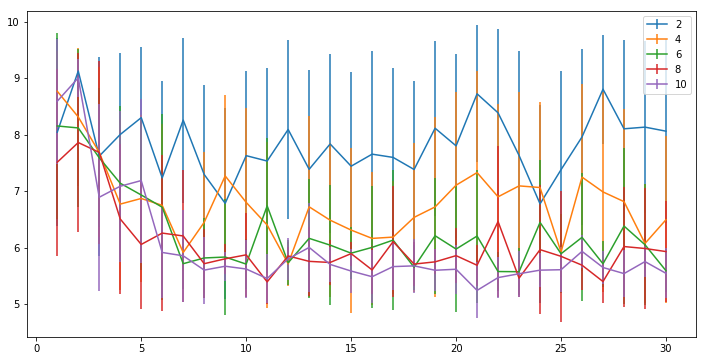

In [312]:
figure(figsize=(12, 6))
for units in sorted(errors_per_second_units):
    errors = errors_per_second_units[units]
    errors_std = stds_per_second_units[units]
    errorbar(units_first_layer, errors, yerr=errors_std, label=str(units))
legend(loc='best')

## Число слоев

In [315]:
num_layers = np.arange(1, 5, 1)
units_per_layer = np.arange(1, 11, 1)

errors_per_num_layers = {}
stds_per_num_layers = {}

for layers in num_layers:
    errors = []
    errors_std = []
    for units in units_per_layer:
        network = [units] * layers
        errors_units = []
        for repeat in xrange(10):
            net = MLPRegressor(
                hidden_layer_sizes=network,
                solver='lbfgs',
                alpha=0.0)
            net.fit(X_train, y_train)
            error = np.sqrt(mean_squared_error(y_test, net.predict(X_test)))
            errors_units.append(error)
        errors.append(np.mean(errors_units))
        errors_std.append(np.std(errors_units))
        print units, errors[-1], errors_std[-1]

    errors_per_num_layers[layers] = errors
    stds_per_num_layers[layers] = errors_std

1 8.97349948543 0.456783743876
2 8.28026452087 1.69971231464
3 7.10198778558 1.8442205488
4 6.76820701337 1.38934148529
5 6.85099678884 1.68101141858
6 5.97448652745 0.803913937565
7 6.14264413563 0.920781588123
8 6.11851938493 1.05444307964
9 5.80813510743 0.664122980385
10 5.79452281934 0.420360943448
1 9.12576072219 3.38842037581e-08
2 8.07161756086 1.62798247917
3 7.29595903298 1.86323138108
4 7.0723924528 1.64178448716
5 6.82995655929 1.5308011446
6 6.47968373847 1.22169104491
7 6.41186507388 1.32445002678
8 6.55240858048 1.14332332613
9 5.82695970947 1.18494362073
10 5.62375783942 0.334899969616
1 8.73087327402 1.18466237105
2 8.2743771685 1.45131283989
3 8.59233213932 1.15999221884
4 7.37431551371 1.63095769302
5 7.10359792962 1.25203800386
6 6.34289453079 0.949936360047
7 5.87881262029 0.723885326939
8 5.94861394007 0.734875116738
9 5.87944848879 0.457779103677
10 5.4675382506 0.416965574448
1 9.12576073271 2.60223595353e-09
2 8.7264645282 1.19930646293
3 8.26233328982 1.293159

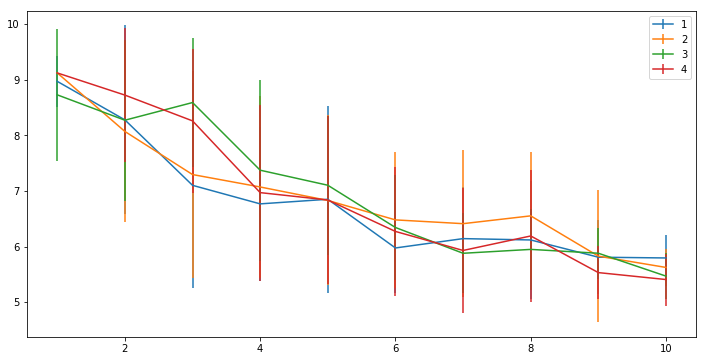

In [316]:
figure(figsize=(12, 6))
for layers in sorted(errors_per_num_layers):
    errors = errors_per_num_layers[layers]
    errors_std = stds_per_num_layers[layers]
    errorbar(units_per_layer, errors, yerr=errors_std, label=str(layers))
legend(loc='best')

## Регуляризация

In [83]:
alphas = np.linspace(0, 0.001, 101)
errors = []
for alpha in alphas:
    net = MLPRegressor(hidden_layer_sizes=(130,), solver='lbfgs', random_state=57, alpha=alpha)
    net.fit(X_train, y_train)
    error = np.sqrt(mean_squared_error(y_test, net.predict(X_test)))
    errors.append(error)

In [88]:
net = MLPRegressor(hidden_layer_sizes=(256,256,256,256), solver='lbfgs', random_state=57, alpha=0)
net.fit(X_train, y_train)
print np.sqrt(mean_squared_error(y_train, net.predict(X_train)))

4.70560936338


# Другой датасет (больше данных)

In [233]:
df_song = pd.read_csv('/Users/artonson/Downloads/YearPredictionMSD.txt', delimiter=',', header=None)

In [246]:
df_song.shape

(515345, 91)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1119d8750>]], dtype=object)

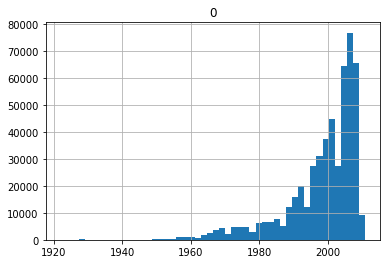

In [237]:
df_song.hist(0, bins=50)

In [241]:
X2 = df_song.as_matrix()[:, 1:]
y2 = df_song.as_matrix()[:, 0]

In [245]:
X2.shape

(515345, 90)

In [253]:
X2_train, X2_test, y2_train, y2_test = X2[:463715, :], X2[463715:, :], y2[:463715], y2[463715:]

In [254]:
X2_test.shape

(51630, 90)

In [399]:
net = MLPRegressor(hidden_layer_sizes=(10,),
                   batch_size=128,
                   solver='adam',
                   alpha=0.0,
                   learning_rate_init=0.001,
                   learning_rate='adaptive',
                   verbose=True)
net.fit(X2_train, y2_train)

Iteration 1, loss = 102739.11753963
Iteration 2, loss = 16154.79949248
Iteration 3, loss = 10133.19867627
Iteration 4, loss = 9150.76941697
Iteration 5, loss = 8863.94152563
Iteration 6, loss = 8672.16262273
Iteration 7, loss = 8464.64989010
Iteration 8, loss = 8344.27335909
Iteration 9, loss = 8120.29980941
Iteration 10, loss = 7996.89573211
Iteration 11, loss = 7873.39356072
Iteration 12, loss = 7762.18650466
Iteration 13, loss = 7622.62171935
Iteration 14, loss = 7560.66160388
Iteration 15, loss = 7439.72169787
Iteration 16, loss = 7342.63251118
Iteration 17, loss = 7207.00974382
Iteration 18, loss = 7157.61562028
Iteration 19, loss = 7006.93066956
Iteration 20, loss = 6975.39458117
Iteration 21, loss = 6843.37466130
Iteration 22, loss = 6769.34937994
Iteration 23, loss = 6668.96115610
Iteration 24, loss = 6563.51936076
Iteration 25, loss = 6464.82846572
Iteration 26, loss = 6386.42967222
Iteration 27, loss = 6286.88729304
Iteration 28, loss = 6156.79584853
Iteration 29, loss = 6061

MLPRegressor(activation='relu', alpha=0.0, batch_size=128, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

## Ансамбль нейросеток

In [318]:
df_concrete = pd.read_excel('/Users/artonson/Downloads/Concrete_Data.xls')

In [321]:
df_concrete

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [322]:
X3 = df_concrete.as_matrix()[:, :-1]
y3 = df_concrete.as_matrix()[:, -1]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)

In [326]:
X3_train.shape

(824, 8)

In [391]:
nets = []
train_errors = []
test_errors = []
for net_index in xrange(20):
    net = MLPRegressor(hidden_layer_sizes=(16,16),
                       solver='lbfgs',
                       alpha=0.0,
                       verbose=True)
    net.fit(X3_train, y3_train)
    train_errors.append(np.sqrt(mean_squared_error(y3_train, net.predict(X3_train))))
    test_errors.append(np.sqrt(mean_squared_error(y3_test, net.predict(X3_test))))
    print 'Net {} quality:'.format(net_index + 1)
    print '    train: {0:.3f}'.format(train_errors[-1])
    print '    test: {0:.3f}'.format(test_errors[-1])
    print 
    nets.append(net)

Net 1 quality:
    train: 6.805
    test: 6.930

Net 2 quality:
    train: 6.782
    test: 6.986

Net 3 quality:
    train: 6.595
    test: 7.026

Net 4 quality:
    train: 10.298
    test: 10.385

Net 5 quality:
    train: 7.074
    test: 7.209

Net 6 quality:
    train: 7.140
    test: 7.237

Net 7 quality:
    train: 7.368
    test: 7.450

Net 8 quality:
    train: 6.872
    test: 6.699

Net 9 quality:
    train: 6.838
    test: 6.731

Net 10 quality:
    train: 6.668
    test: 6.637

Net 11 quality:
    train: 7.445
    test: 7.476

Net 12 quality:
    train: 6.653
    test: 6.559

Net 13 quality:
    train: 7.319
    test: 7.097

Net 14 quality:
    train: 8.889
    test: 8.701

Net 15 quality:
    train: 6.844
    test: 6.555

Net 16 quality:
    train: 7.801
    test: 7.240

Net 17 quality:
    train: 6.909
    test: 6.717

Net 18 quality:
    train: 6.688
    test: 6.760

Net 19 quality:
    train: 8.046
    test: 8.170

Net 20 quality:
    train: 6.957
    test: 6.792



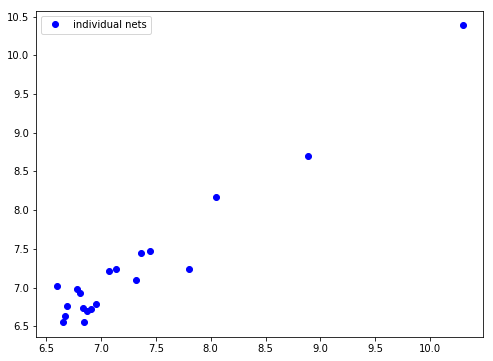

In [392]:
figure(figsize=(8,6))
plot(train_errors, test_errors, 'bo', label='individual nets')
legend(loc='best')

### Усреднение всех сеток

In [393]:
y_pred_test_average = []
y_pred_train_average = []
for net in nets:
    y_pred_net = net.predict(X3_train)
    y_pred_train_average.append(y_pred_net)
    y_pred_net = net.predict(X3_test)
    y_pred_test_average.append(y_pred_net)
    
y_pred_train_avg = np.mean(y_pred_train_average, axis=0)
y_pred_test_avg = np.mean(y_pred_test_average, axis=0)
train_avg_error = np.sqrt(mean_squared_error(y3_train, y_pred_train_avg))
test_avg_error = np.sqrt(mean_squared_error(y3_test, y_pred_test_avg))

print 'Averaging quality:'
print '    train: {0:.3f}'.format(train_avg_error)
print '    test: {0:.3f}'.format(test_avg_error)

Averaging quality:
    train: 6.728
    test: 6.684


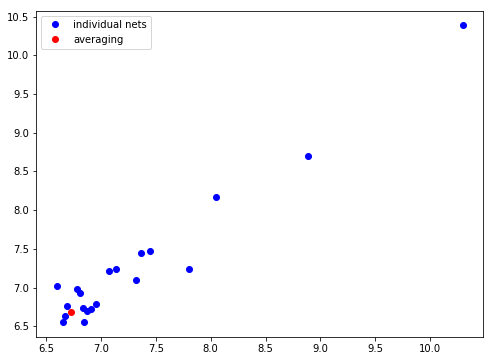

In [394]:
figure(figsize=(8,6))
plot(train_errors, test_errors, 'bo', label='individual nets')
plot([train_avg_error], [test_avg_error], 'ro', label='averaging')
legend(loc='best')

### Лучшая сетка

In [395]:
best_net = nets[np.argmin(train_errors)]

y_pred_best_train = best_net.predict(X3_train)
y_pred_best_test = best_net.predict(X3_test)
train_best_error = np.sqrt(mean_squared_error(y3_train, y_pred_best_train))
test_best_error = np.sqrt(mean_squared_error(y3_test, y_pred_best_test))

print 'Averaging quality:'
print '    train: {0:.3f}'.format(train_best_error)
print '    test: {0:.3f}'.format(test_best_error)

Averaging quality:
    train: 6.595
    test: 7.026


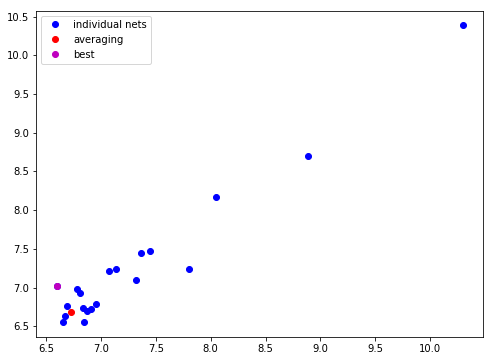

In [396]:
figure(figsize=(8,6))
plot(train_errors, test_errors, 'bo', label='individual nets')
plot([train_avg_error], [test_avg_error], 'ro', label='averaging')
plot([train_best_error], [test_best_error], 'mo', label='best')
legend(loc='best')

### Усредняем top-k лучших

In [397]:
y_pred_train_average = []
y_pred_test_average = []

train_topk_errors = []
test_topk_errors = []
for best_nets_index in np.argsort(train_errors):
    net = nets[best_nets_index]
    
    y_pred_net = net.predict(X3_train)
    y_pred_train_average.append(y_pred_net)
    y_pred_net = net.predict(X3_test)
    y_pred_test_average.append(y_pred_net)
    
    y_pred_train_avg = np.mean(y_pred_train_average, axis=0)
    y_pred_test_avg = np.mean(y_pred_test_average, axis=0)
    
    train_topk_errors.append(np.sqrt(mean_squared_error(y3_train, y_pred_train_avg)))
    test_topk_errors.append(np.sqrt(mean_squared_error(y3_test, y_pred_test_avg)))

    print 'Averaging top {}:'.format(len(y_pred_train_average))
    print '    train: {0:.3f}'.format(train_topk_errors[-1])
    print '    test:  {0:.3f}'.format(test_topk_errors[-1])
    print

Averaging top 1:
    train: 6.595
    test:  7.026

Averaging top 2:
    train: 6.495
    test:  6.656

Averaging top 3:
    train: 6.407
    test:  6.508

Averaging top 4:
    train: 6.411
    test:  6.515

Averaging top 5:
    train: 6.381
    test:  6.501

Averaging top 6:
    train: 6.399
    test:  6.514

Averaging top 7:
    train: 6.416
    test:  6.498

Averaging top 8:
    train: 6.434
    test:  6.457

Averaging top 9:
    train: 6.461
    test:  6.460

Averaging top 10:
    train: 6.492
    test:  6.468

Averaging top 11:
    train: 6.521
    test:  6.483

Averaging top 12:
    train: 6.523
    test:  6.496

Averaging top 13:
    train: 6.550
    test:  6.529

Averaging top 14:
    train: 6.572
    test:  6.534

Averaging top 15:
    train: 6.587
    test:  6.547

Averaging top 16:
    train: 6.602
    test:  6.567

Averaging top 17:
    train: 6.624
    test:  6.552

Averaging top 18:
    train: 6.642
    test:  6.589

Averaging top 19:
    train: 6.682
    test:  6.629

Av

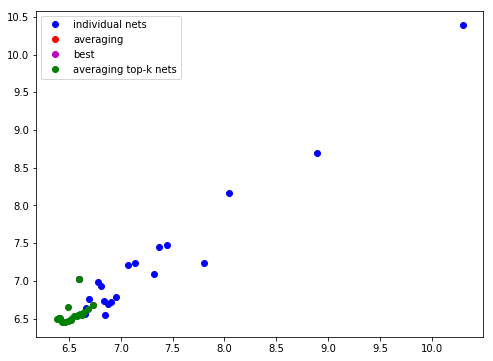

In [398]:
figure(figsize=(8,6))
plot(train_errors, test_errors, 'bo', label='individual nets')
plot([train_avg_error], [test_avg_error], 'ro', label='averaging')
plot([train_best_error], [test_best_error], 'mo', label='best')
plot(train_topk_errors, test_topk_errors, 'go', label='averaging top-k nets')
legend(loc='best')